# 🏠 Train-Test Split Step-by-Step Guide
This lab will guide you step-by-step through the concept of **train_test_split** using a real housing dataset.
We will NOT train any machine learning models here. Instead, we will:
- Load the dataset
- Explore the data
- Split it into training and testing sets
- Analyze the data distribution before and after splitting

In [46]:
import IPython
import sys

def clean_notebook():
    IPython.display.clear_output(wait=True)
    print("Notebook cleaned.")

!pip install seaborn

# Clean up the notebook
clean_notebook()

Notebook cleaned.


## Step 1: Import Libraries

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Load Dataset
We will use the **King County House Sales** dataset.

In [48]:
df = pd.read_csv('kingCountyHouseData.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Step 3: Select Relevant Features
We will keep only the columns we care about.

In [49]:
columns = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','price']
df = df[columns]
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
0,3,1.00,1180,5650,1.0,221900.0
1,3,2.25,2570,7242,2.0,538000.0
2,2,1.00,770,10000,1.0,180000.0
3,4,3.00,1960,5000,1.0,604000.0
4,3,2.00,1680,8080,1.0,510000.0


## Step 4: Quick Data Info

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     21613 non-null  int64  
 1   bathrooms    21613 non-null  float64
 2   sqft_living  21613 non-null  int64  
 3   sqft_lot     21613 non-null  int64  
 4   floors       21613 non-null  float64
 5   price        21613 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 1013.2 KB


## Step 5: Basic Statistics

In [51]:
df.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,2.161300e+04
mean,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,5.400881e+05
std,0.930062,0.770163,918.440897,4.142051e+04,0.539989,3.671272e+05
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,7.500000e+04
25%,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,3.219500e+05
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,4.500000e+05
75%,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,6.450000e+05
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,7.700000e+06


## Step 6: Visualize Original Price Distribution

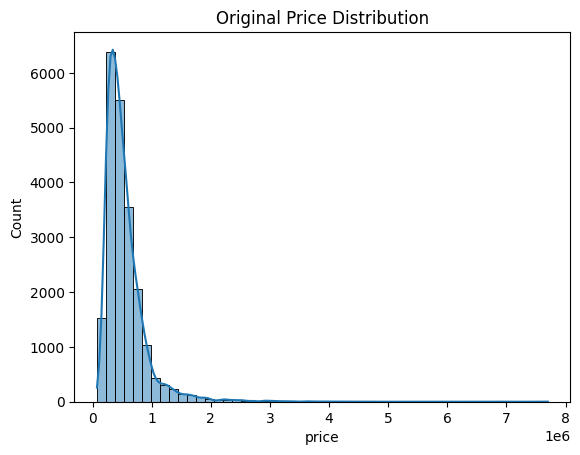

In [52]:
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Original Price Distribution')
plt.show()

## Step 7: Split the Dataset
We will split the data into **train** and **test** sets using sklearn's `train_test_split` function.
- `test_size=0.2` means 20% of the data will be used for testing.
- `random_state=42` ensures the split is reproducible.

In [53]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42, shuffle=False)
len(train_set), len(test_set)

(17290, 4323)

In [54]:
df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
0,3,1.00,1180,5650,1.0,221900.0
1,3,2.25,2570,7242,2.0,538000.0
2,2,1.00,770,10000,1.0,180000.0
3,4,3.00,1960,5000,1.0,604000.0
4,3,2.00,1680,8080,1.0,510000.0
...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,360000.0
21609,4,2.50,2310,5813,2.0,400000.0
21610,2,0.75,1020,1350,2.0,402101.0
21611,3,2.50,1600,2388,2.0,400000.0


In [55]:
train_set

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
0,3,1.00,1180,5650,1.0,221900.0
1,3,2.25,2570,7242,2.0,538000.0
2,2,1.00,770,10000,1.0,180000.0
3,4,3.00,1960,5000,1.0,604000.0
4,3,2.00,1680,8080,1.0,510000.0
...,...,...,...,...,...,...
17285,4,2.50,2470,2550,3.0,735000.0
17286,5,2.50,2760,8015,1.0,378000.0
17287,3,2.00,2540,7200,1.5,775000.0
17288,3,4.25,5150,7800,2.5,2250000.0


In [56]:
test_set

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
17290,4,2.50,2270,11500,1.0,380000.0
17291,4,2.50,2270,11500,1.0,624900.0
17292,3,2.50,1470,1779,2.0,379770.0
17293,3,1.75,1280,16200,1.0,340000.0
17294,4,2.75,2830,8126,2.0,515500.0
...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,360000.0
21609,4,2.50,2310,5813,2.0,400000.0
21610,2,0.75,1020,1350,2.0,402101.0
21611,3,2.50,1600,2388,2.0,400000.0


## Step 8: Price Distribution in Training Set

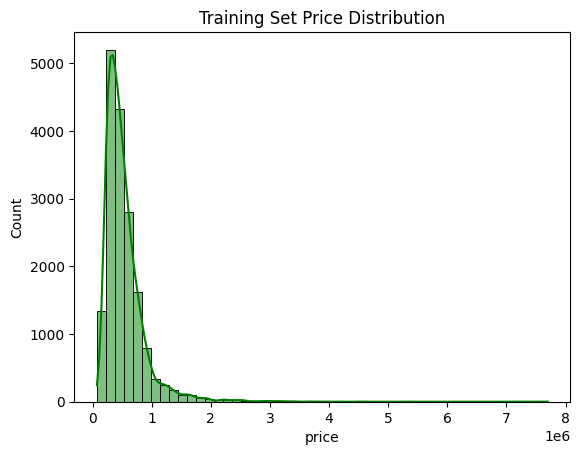

In [57]:
sns.histplot(train_set['price'], bins=50, kde=True, color='green')
plt.title('Training Set Price Distribution')
plt.show()

## Step 9: Price Distribution in Test Set

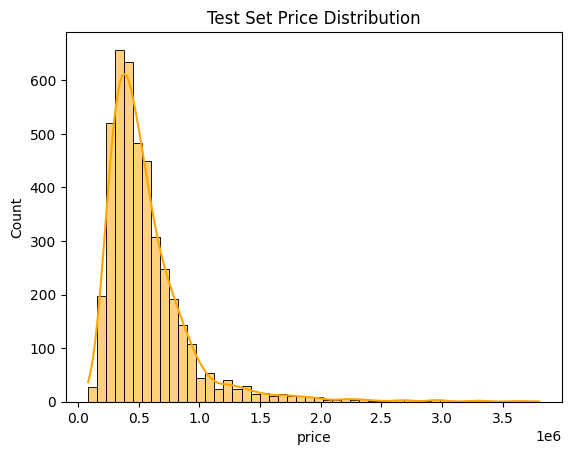

In [58]:
sns.histplot(test_set['price'], bins=50, kde=True, color='orange')
plt.title('Test Set Price Distribution')
plt.show()

## Step 10: Compare Average Prices

In [59]:
print('Average price in training set:', train_set['price'].mean())
print('Average price in test set:', test_set['price'].mean())

Average price in training set: 533247.4934065935
Average price in test set: 567447.5704371964


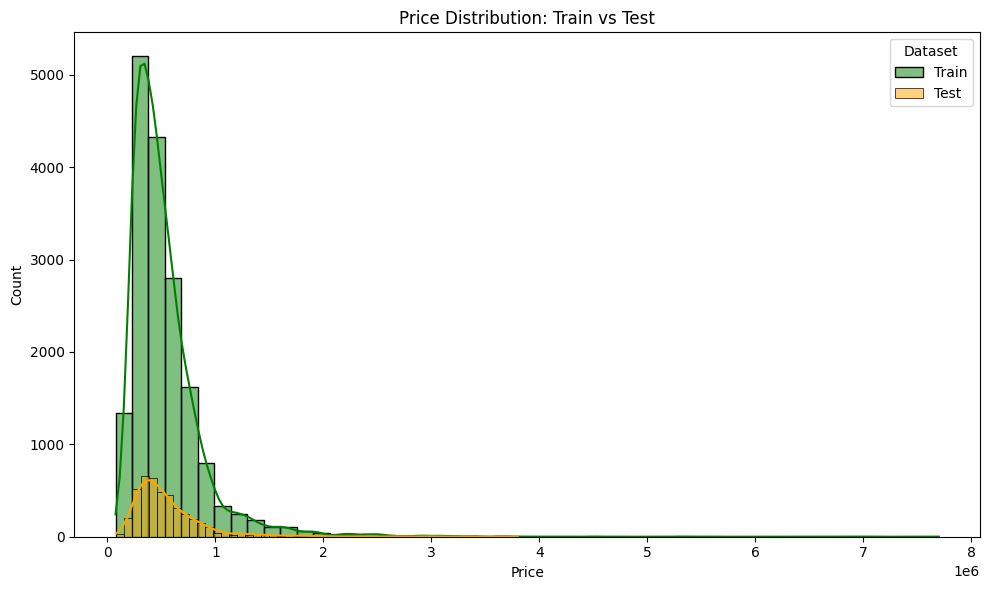

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

# Plot training set
sns.histplot(train_set['price'], bins=50, kde=True, color='green', label='Train', alpha=0.5)

# Plot test set
sns.histplot(test_set['price'], bins=50, kde=True, color='orange', label='Test', alpha=0.5)

plt.title('Price Distribution: Train vs Test')
plt.xlabel('Price')
plt.ylabel('Count')
plt.legend(title='Dataset')
plt.tight_layout()
plt.show()
